# Anomaly Detection Notebook
Created 8-8-19

Brad Haren

## Purpose
This notebook outines multiple ways to implement anomaly detection with Python

To start - import all necessary libraries

In [1]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
from matplotlib import style
import matplotlib.font_manager
style.use('fivethirtyeight')
%matplotlib inline

Next we will create three functions in order to detect anomalies.

'moving_average' function creates a moving average line of the data.

'anomalies' function calculates residual from the y value versus the average, and compares it with the standard deviation. Any value outside of the range (avg + standard deviation) will be considered an outlier.

'plot_results' utilizes the previous two functions and uses the results to plot the moving average line as well as any anomalies.

In [2]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def anomalies(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

def plot_results(x, y, window_size, sigma_value=1,
                 xlabel='X Axis', ylabel='Y Axis',xlim=1000):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, 'k.')
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    events = {}
    events = anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float, count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, 'r*', markersize=12)

    plt.grid(True)
    plt.show()

## Examples

## Standard Deviation Approach

We start by using the pandas module to load our data into a DataFrame

In [5]:
df = pd.read_csv('C:/Users/HARENB/Desktop/CSV Files/sunspots.csv', sep='\t')
df.head(3)

,Month,SunSpots
0,0,58.0
1,1,62.6
2,2,70.0


Next, we define our x values and y values from the DataFrame, and pass them into the plot_results function we defined earlier. 

Change sigma_value to change the severity of the anomaly detector
Change xlim in order to view a certain slice of the graph (shows 1000 points by default)

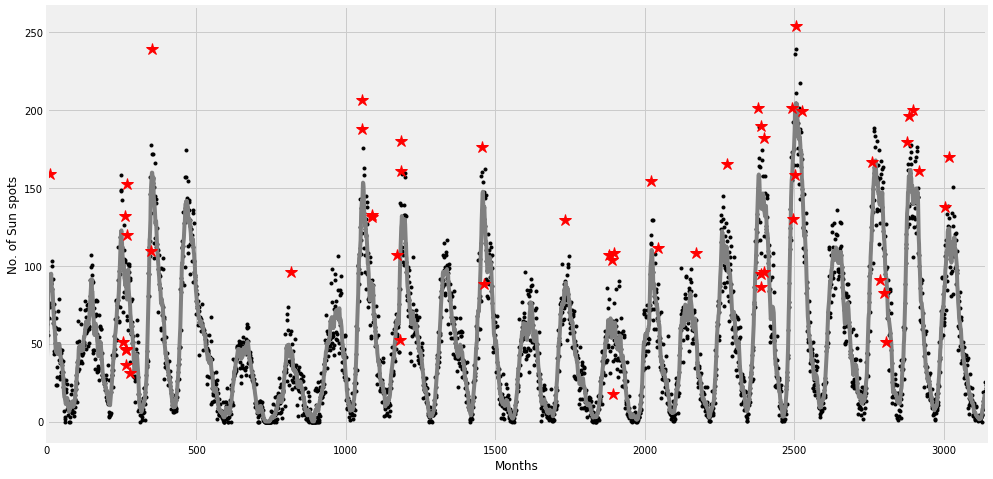

Info:{'standard_deviation': 11.424, 'anomalies_dict': OrderedDict([(10, 158.6), (253, 142.5), (255, 51.0), (262, 132.2), (264, 36.0), (268, 152.7), (278, 31.1), (349, 109.3), (352, 238.9), (361, 165.7), (818, 96.2), (986, 93.4), (1055, 206.3), (1069, 84.8), (1172, 107.1), (1182, 52.2), (1185, 180.4), (1464, 88.3), (1735, 129.2), (1882, 107.2), (1890, 103.6), (1897, 108.2), (2023, 154.5), (2025, 72.2), (2027, 129.3), (2171, 108.0), (2274, 165.3), (2380, 201.3), (2390, 94.8), (2391, 189.7), (2503, 158.0), (2518, 152.3), (2520, 217.4), (2521, 143.1), (2527, 199.6), (2755, 58.1), (2756, 138.2), (2789, 90.9), (2807, 127.0), (2885, 196.2), (2886, 126.9), (2897, 105.4), (2899, 200.3), (3005, 137.7), (3018, 170.1), (3032, 150.7)])}


In [6]:
x = df['Month']
y = df['SunSpots']

# plot
plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='No. of Sun spots', xlim=len(y))
events = anomalies(y, window_size=5, sigma=3)

# display standard deviation and anomalous points
print(f'Info:{events}')

Repeat with new data - this time seasonal and increasing

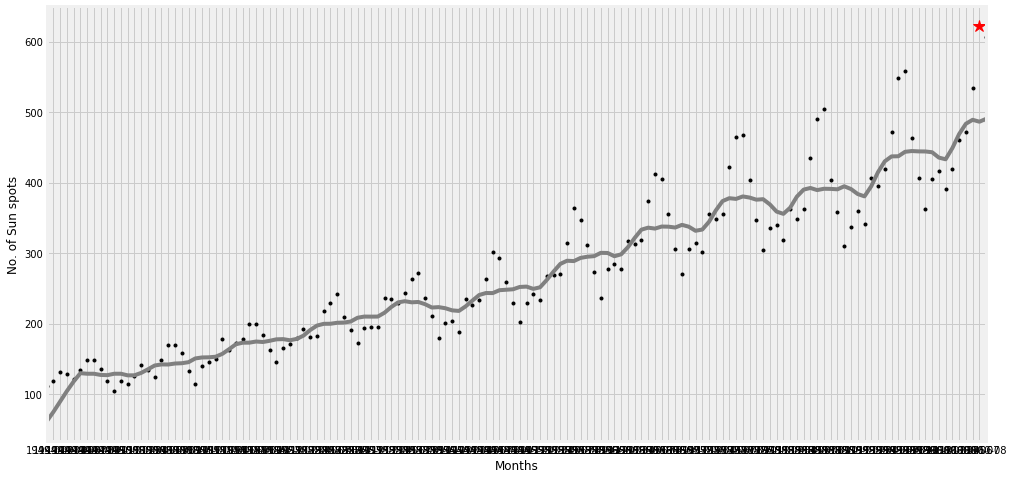

Info:{'standard_deviation': 26.75, 'anomalies_dict': OrderedDict([(143, 432)])}


In [7]:
df = pd.read_csv('C:/Users/HARENB/Desktop/IPYNB tests/AirPassengers.csv')

x = df['Month']
y = df['#Passengers']

plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='No. of Sun spots', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

And again with something more random

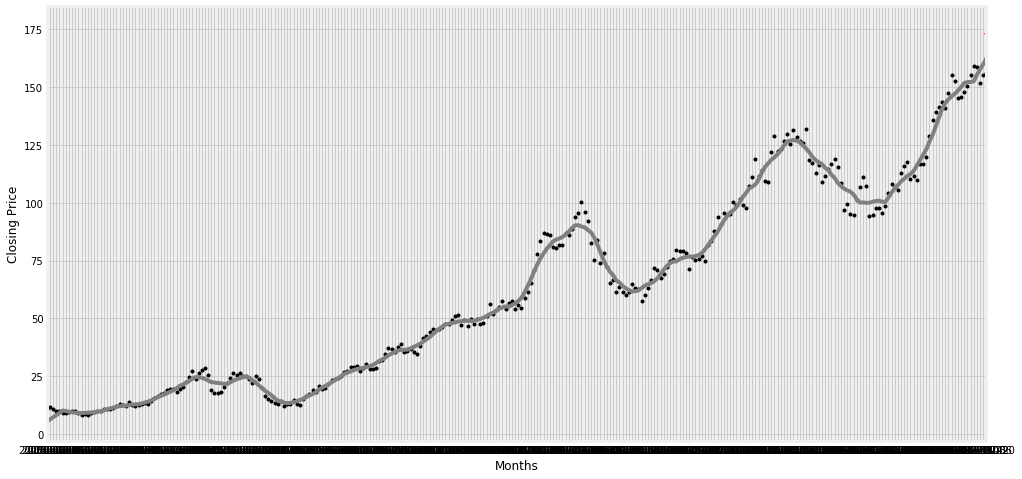

Info:{'standard_deviation': 5.112, 'anomalies_dict': OrderedDict([(300, 169.8), (301, 176.42)])}


In [8]:
df = pd.read_csv('C:/Users/HARENB/Desktop/CSV Files/AAPL_2006-01-01_to_2018-01-01.csv').iloc[::10,:]

x = df['Date']
y = df['Close']

plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='Closing Price', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

In [9]:
import os
os.chdir('C:/Users/HARENB/Desktop/Folds Data/')

## Testing with stationary Data:

In [10]:
df = pd.read_csv('Folds5x2_pp_Sheet1.csv').reset_index()

In [11]:
df.tail(3)

,index,AT,V,AP,RH,PE
9565,9565,31.32,74.33,1012.92,36.48,429.57
9566,9566,24.48,69.45,1013.86,62.39,435.74
9567,9567,21.60,62.52,1017.23,67.87,453.28


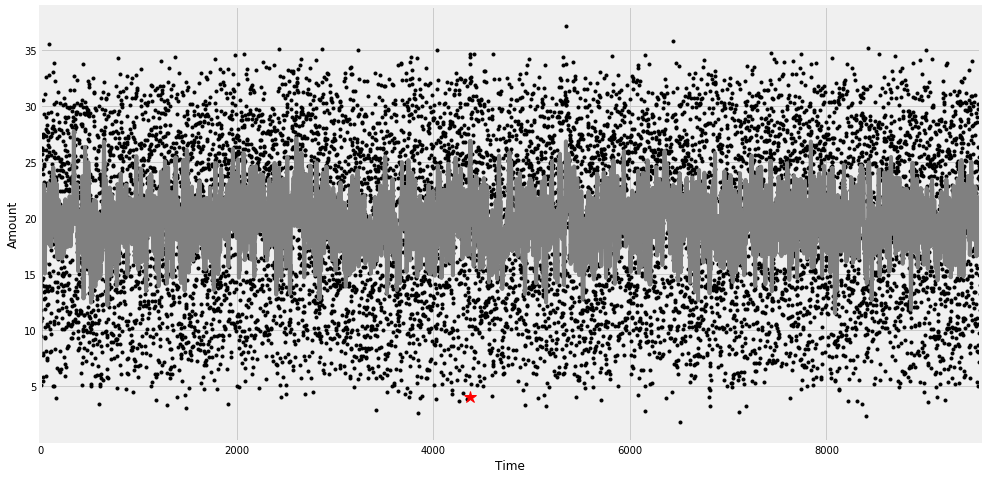

Info:{'standard_deviation': 6.668, 'anomalies_dict': OrderedDict([(4375, 3.96)])}


In [12]:
x = df['index']
y = df['AT']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

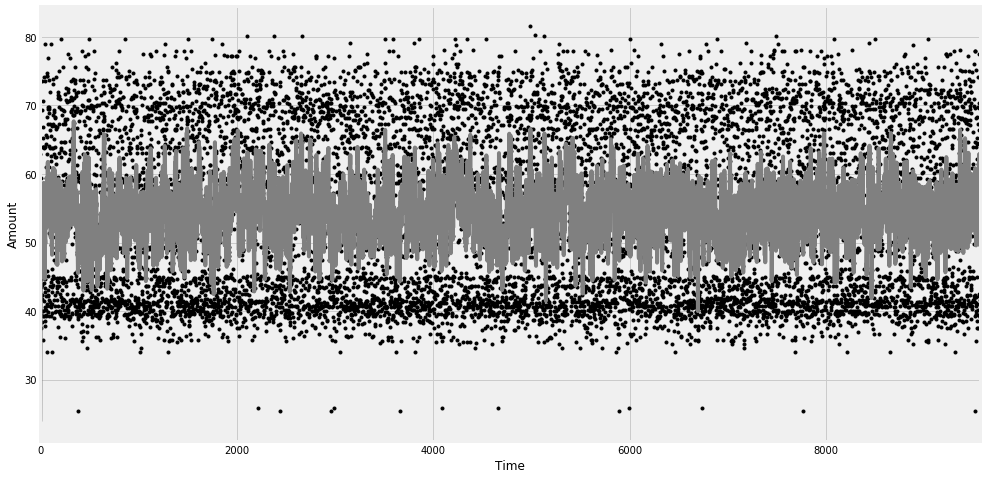

Info:{'standard_deviation': 11.368, 'anomalies_dict': OrderedDict()}


In [13]:
x = df['index']
y = df['V']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

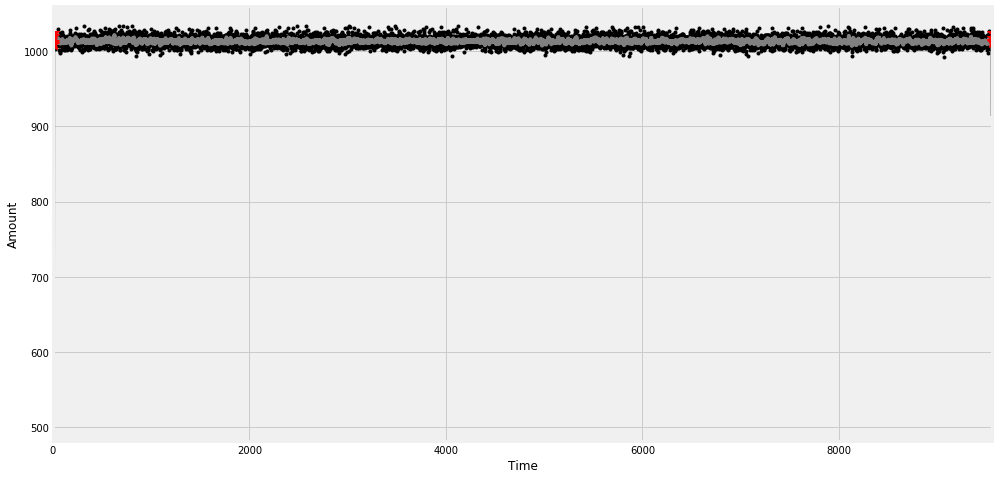

Info:{'standard_deviation': 8.491, 'anomalies_dict': OrderedDict([(0, 1024.07), (1, 1020.04), (9566, 1013.86), (9567, 1017.23)])}


In [14]:
df = pd.read_csv('Folds5x2_pp_Sheet1.csv').reset_index()
x = df['index']
y = df['AP']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

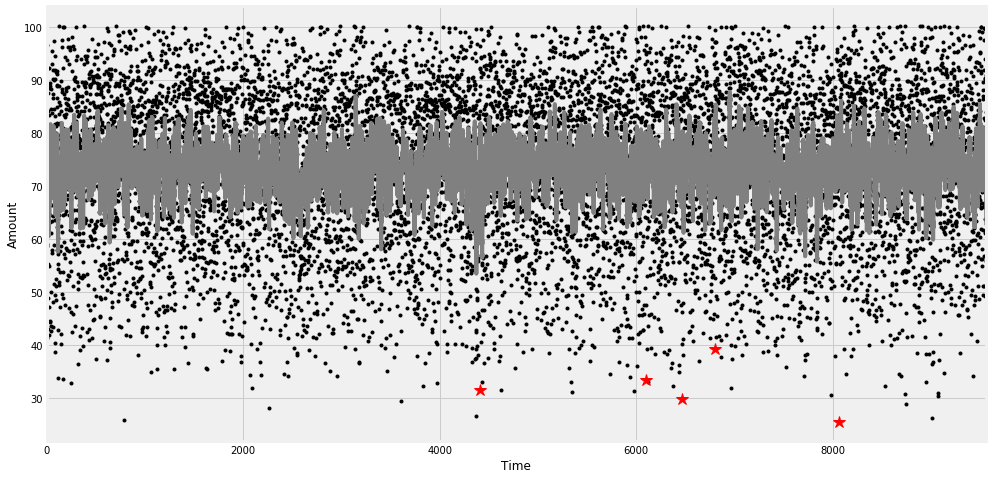

Info:{'standard_deviation': 13.142, 'anomalies_dict': OrderedDict([(1129, 99.22), (4367, 26.67), (4371, 99.68), (4410, 31.45), (6101, 33.41), (6120, 32.95), (6472, 29.86), (6968, 40.04), (7237, 98.77), (8061, 25.56), (8737, 30.83), (8751, 28.81), (9015, 26.3), (9018, 36.71), (9132, 34.64)])}


In [15]:
x = df['index']
y = df['RH']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

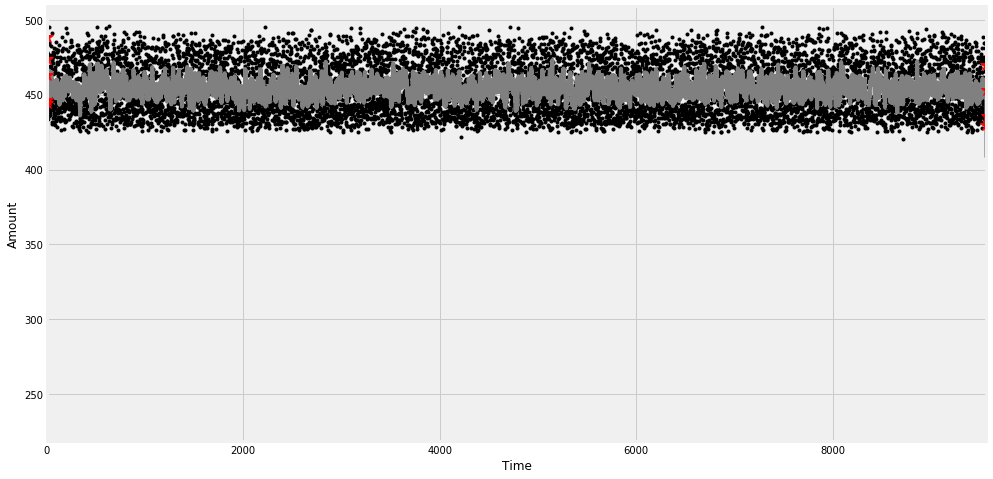

Info:{'standard_deviation': 15.522, 'anomalies_dict': OrderedDict([(0, 463.26), (1, 444.37), (9566, 435.74), (9567, 453.28)])}


In [16]:
x = df['index']
y = df['PE']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

It's clear that this method seems better suited to cyclical or increasing data. It does not perform very well with stationary data. So, let's try another approach.

## ML Approach

Next, instead of a basic standard deviation approach, we will use machine learning to determine outliers.

We again start with imports.

In [70]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.font_manager
style.use('fivethirtyeight')
import pandas as pd
import numpy as np
from scipy import stats
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

import warnings

Loading Data

In [71]:
df = pd.read_csv('C:/Users/HARENB/Desktop/Folds Data/Folds5x2_pp_Sheet1.csv').reset_index()
df.head()

,index,AT,V,AP,RH,PE
0,0,14.96,41.76,1024.07,73.17,463.26
1,1,25.18,62.96,1020.04,59.08,444.37
2,2,5.11,39.40,1012.16,92.14,488.56
3,3,20.86,57.32,1010.24,76.64,446.48
4,4,10.82,37.50,1009.23,96.62,473.90


Above, we see our DataFrame. Change 'var_name' in the cell below to experiment with the different columns of data.

In [72]:
var_name = 'RH'

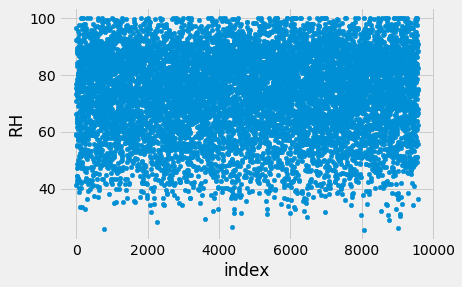

In [73]:
df.plot.scatter('index', var_name)

Since our data involves very large numbers, we will need to scale down these values so our end result does not appear to be warped. We can use the MinMaxScalar from sklearn.preprocessing to change each value to something between 0 and 1.

In [74]:
from sklearn.preprocessing import MinMaxScaler

#normalizing data
warnings.filterwarnings('ignore')

scaler = MinMaxScaler(feature_range=(0, 1))
df[['index',var_name]] = scaler.fit_transform(df[['index',var_name]])
df[['index',var_name]].head(3)

,index,RH
0,0.000000,0.638204
1,0.000105,0.449330
2,0.000209,0.892493


Next, we will save this shaped data into numpy arrays for later usage.

In [84]:
X1.reshape(-1,1)

array([[0.00000000e+00],
       [1.04525975e-04],
       [2.09051949e-04],
       ...,
       [9.99790948e-01],
       [9.99895474e-01],
       [1.00000000e+00]])

In [76]:
X1 = df['index'].values.reshape(-1,1)
X2 = df[var_name].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

Next, we can create a dictionary containing the names and implementations of all of the anomaly detection techniques we wish to utilize.

Change the 'outliers_fraction' varaible in order to change the percentage of data we wish to find as outliers. Lower = less outliers.

In [23]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.01
classifiers = {
        'K Nearest Neighbors (KNN)':KNN(contamination=outliers_fraction),
        'Average KNN':KNN(method='mean',contamination=outliers_fraction),
        'Angle-based Outlier Detector (ABOD)':ABOD(contamination=outliers_fraction),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)':HBOS(contamination=outliers_fraction),
        'Isolation Forest':IForest(contamination=outliers_fraction,random_state=random_state,behaviour='new')
}

Next, we fit the data to each model and compare the results.

### Running the models

```python
for i, (clf_name, clf) in enumerate(classifiers.items())
```
simply grabs the classifier name and classifier model in order to get results from each model.

The 'decision_function' function is used to generate raw anomaly values of each point. Here we pass in 'X', the array we created earlier.

The 'predict' function is used to actually use the model and predict if the sample is an outlier or not.

Next, we create a copy of our original DataFrame and add a new column that will contain outliers predictions.

```python
    IX1 =  np.array(dfx['index'][dfx['Outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx[var_name][dfx['Outlier'] == 0]).reshape(-1,1)
   
    OX1 =  dfx['index'][dfx['Outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx[var_name][dfx['Outlier'] == 1].values.reshape(-1,1)
```
These 4 lines are used to create arrays of of normalized values. 

IX1 and IX2 include locations of values which are 'inliers' (i.e. not outliers), and OX1/OX2 contain outliers.

'threshold' is used to determine if a point is an inlier or an outlier in conjunction with our 'outliers_fraction' variable that we defined earlier

Lastly, we plot these values using matplotlib

OUTLIERS: 73 INLIERS: 9495
Using K Nearest Neighbors (KNN)


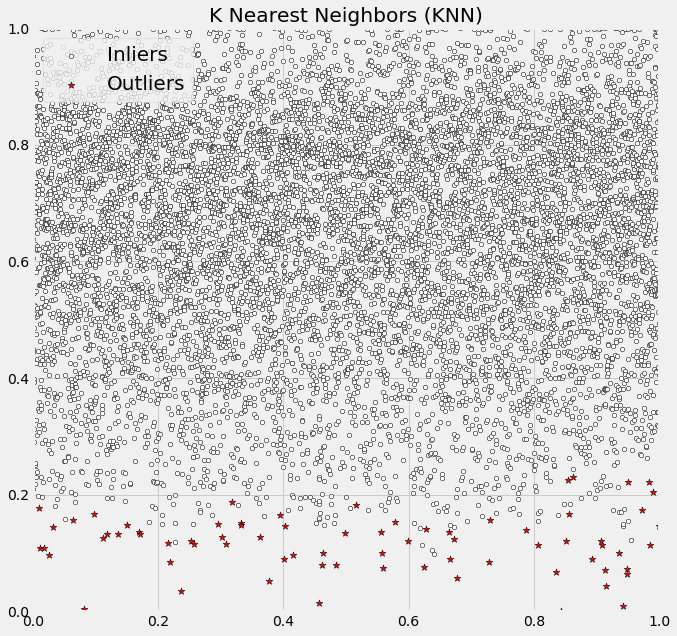

OUTLIERS: 41 INLIERS: 9527
Using Average KNN


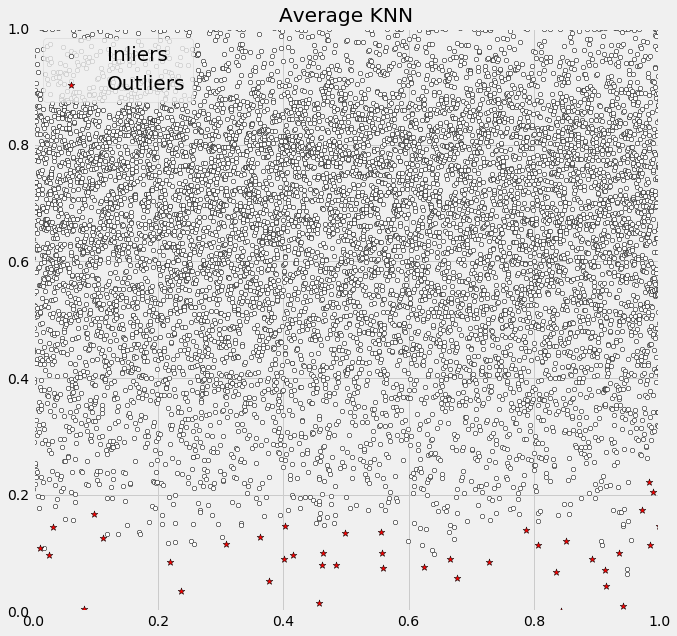

OUTLIERS: 102 INLIERS: 9466
Using Angle-based Outlier Detector (ABOD)


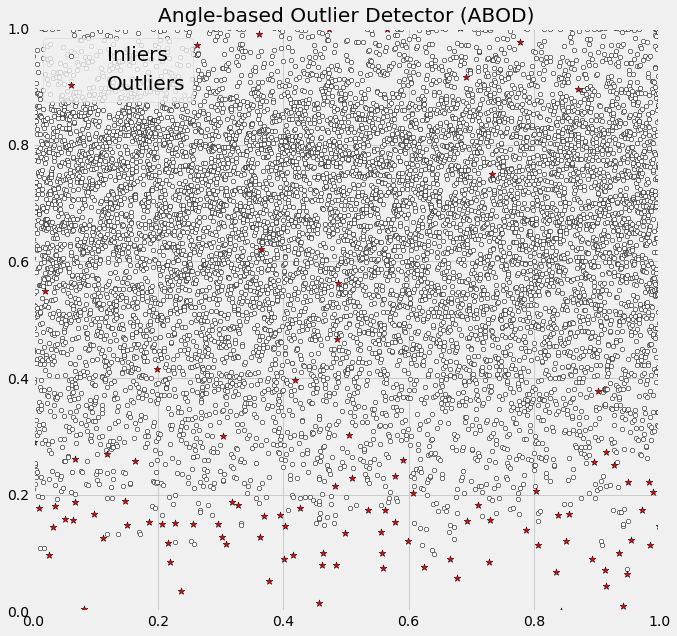

OUTLIERS: 88 INLIERS: 9480
Using Feature Bagging


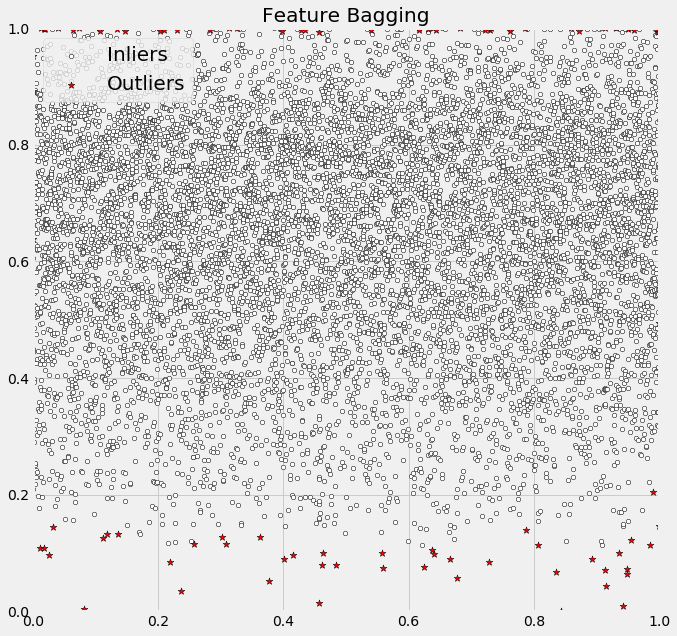

OUTLIERS: 88 INLIERS: 9480
Using Histogram-base Outlier Detection (HBOS)


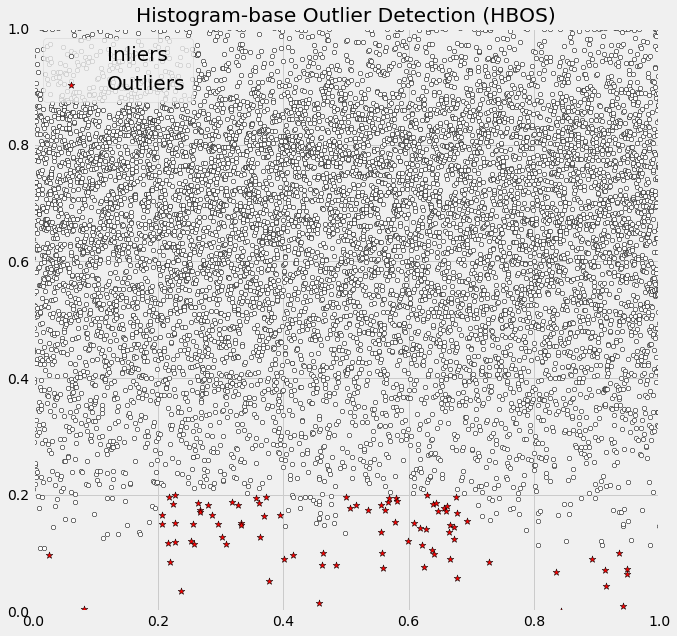

OUTLIERS: 96 INLIERS: 9472
Using Isolation Forest


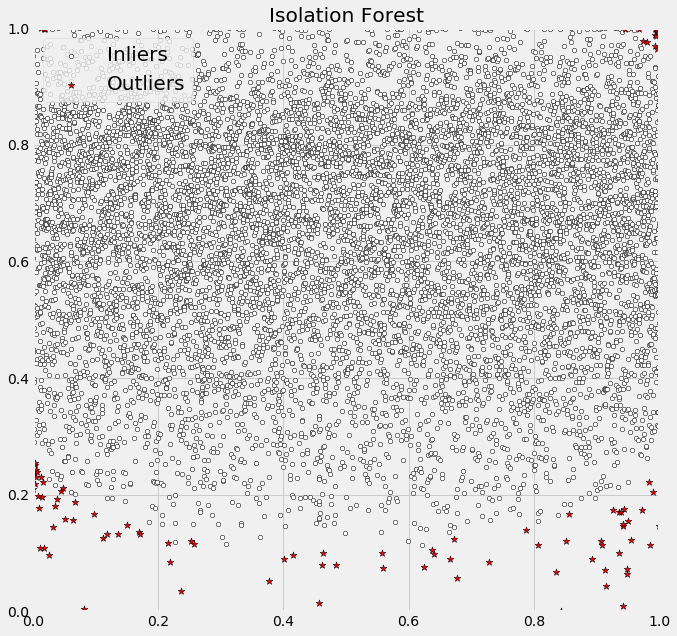

In [35]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    #predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    #prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    #new df w/ outliers
    dfx = df
    dfx['Outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['index'][dfx['Outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx[var_name][dfx['Outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['index'][dfx['Outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx[var_name][dfx['Outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS: '+str(n_outliers)+' INLIERS: '+str(n_inliers)+ '\nUsing '+str(clf_name))
        
    #threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, marker='*',c='red',s=50, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [b,c],
        ['Inliers','Outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()

Let's package this into a function for repeated use and readability.

In [51]:
from sklearn.preprocessing import Binarizer

In [3]:
#all libraries needed to run function
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.font_manager
import pandas as pd
import numpy as np
style.use('fivethirtyeight')
from scipy import stats
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

In [6]:
def get_outliers(path,column_name,outliers_fraction=0.01,knn=False,aknn=False, 
                 abod=False,fb=False,hbos=False,isoforest=False):
    '''
    Function to graph outliers of a certain 2-variable dataset.
    Pass in the types of anomaly detection you wish to use as True.
    
    Parameters:
    
    path :string: path of csv file with data
    column_name :string: name of column of data you wish to view
    
    Optional Parameters:
    
    outliers_fraction :float, default=0.01: fraction of data you want classified as outliers
    knn :bool, default=False: includes KNN
    aknn :bool: default=False: includes Average KNN
    abod :bool: default=False: includes Angle Based Outlier Detector
    fb :bool: default=False: includes Feature Bagging
    hbos :bool: default=False: includes Histogram Based Outlier Detection
    isoforest :bool: default=False: includes Isolation Forest
    '''

    #creating index column from 0 to length of data
    df = pd.read_csv(path).reset_index()
    
    #converting index column to float to avoid warning
    df['index'] = df['index'].astype(float)

    #normalizing data
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[['index',column_name]] = scaler.fit_transform(df[['index',column_name]])
    df[['index',column_name]].head(3)
    
    X1 = df['index'].values.reshape(-1,1)
    X2 = df[column_name].values.reshape(-1,1)
    
    X = np.concatenate((X1,X2),axis=1)
    
    classifiers = {}
    if knn:
        classifiers.update({'K Nearest Neighbors (KNN)':KNN(contamination=outliers_fraction)})
    if aknn:
        classifiers.update({'Average KNN':KNN(method='mean',contamination=outliers_fraction)})
    if abod:
        classifiers.update({'Angle-based Outlier Detector (ABOD)':ABOD(contamination=outliers_fraction)})
    if fb:
        classifiers.update({'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),
                                                             contamination=outliers_fraction,check_estimator=False)})
    if hbos:
        classifiers.update({'Histogram-base Outlier Detection (HBOS)':HBOS(contamination=outliers_fraction)})
    if isoforest:
        classifiers.update({'Isolation Forest':IForest(contamination=outliers_fraction,behaviour='new')})
    
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(X)
        
        #predicting raw anomaly score
        scores_pred = clf.decision_function(X) * -1

        #predicting a datapoint category as an outlier or inlier
        y_pred = clf.predict(X)
        n_inliers = len(y_pred) - np.count_nonzero(y_pred)
        n_outliers = np.count_nonzero(y_pred == 1)
        plt.figure(figsize=(10, 10))

        #new df containing outliers
        dfx = df
        dfx['Outlier'] = y_pred.tolist()

        # IX1 - inlier feature 1,  IX2 - inlier feature 2
        IX1 = np.array(dfx['index'][dfx['Outlier'] == 0]).reshape(-1,1)
        IX2 = np.array(dfx[column_name][dfx['Outlier'] == 0]).reshape(-1,1)

        # OX1 - outlier feature 1, OX2 - outlier feature 2
        OX1 = dfx['index'][dfx['Outlier'] == 1].values.reshape(-1,1)
        OX2 = dfx[column_name][dfx['Outlier'] == 1].values.reshape(-1,1)

        print(f'OUTLIERS: {str(n_outliers)} INLIERS: {str(n_inliers)} \nUsing {str(clf_name)}')

        #threshold value to consider a datapoint inlier or outlier
        threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

        b = plt.scatter(IX1,IX2, c='white', s=20, edgecolor='k')

        c = plt.scatter(OX1,OX2, marker='*', c='red', s=50, edgecolor='k')

        plt.axis('tight')  

        # loc=2 is used for the top left corner 
        plt.legend(
            [b,c],
            ['Inliers','Outliers'],
            prop=matplotlib.font_manager.FontProperties(size=20),
            loc=2)
        
        plt.xlim((0, 1))
        plt.ylim((0, 1))
        plt.title(clf_name)
        plt.show()

OUTLIERS: 41 INLIERS: 9527 
Using Average KNN


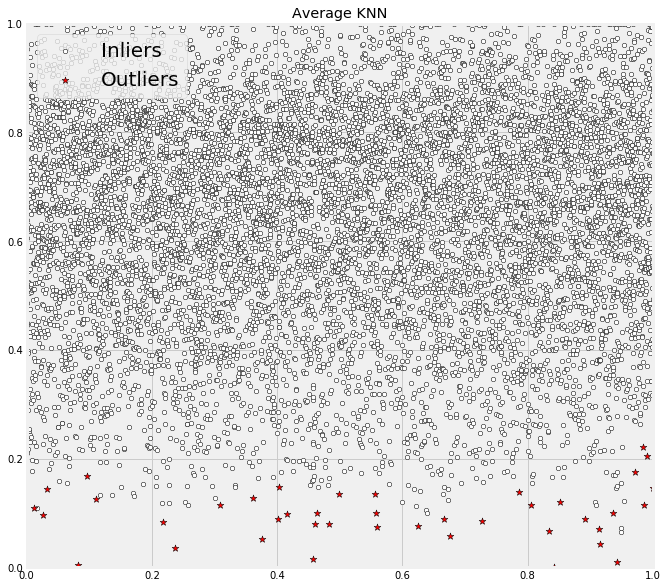

In [5]:
get_outliers('C:/Users/HARENB/Desktop/Folds Data/Folds5x2_pp_Sheet1.csv','RH',aknn=True)